# P3: OpenStreetMap Data Case Study. Dubai and Abu-Dhabi.

### 0. Code Resources

#### 0.1. Code Library

In [1]:
# IRkernel::installspec(name = 'ir33', displayname = 'R 3.3')

In [2]:
library(rmarkdown)

In [13]:
library(dplyr)

In [14]:
library(ggplot2)

In [15]:
library(ff)

In [6]:
library(rio)

In [7]:
library(devtools)

In [16]:
library(bigmemory)

In [111]:
library(formattable)

In [99]:
# devtools::install_github("ropensci/plotly")

In [9]:
# install.packages('mongo-r-driver')

In [10]:
# install.packages('rstudio')

In [11]:
# install.packages('ggforce')

In [12]:
# install.packages("rgeos") 

In [23]:
# install.packages("mapview")

In [24]:
# library(ggforce)

In [25]:
# library(rgeos)

In [26]:
# library(mapview)

In [27]:
# library(rstudio)

In [17]:
library(ggthemes)

In [18]:
library(RColorBrewer)

In [100]:
library(plotly)

In [36]:
library(dygraphs)

In [37]:
library(leaflet)

In [38]:
library(highcharter)

In [39]:
library(rbokeh)

In [40]:
library(maps)

In [41]:
library(maptools)

In [42]:
library(ggmap)

In [43]:
library(osmar)

In [44]:
library(R2HTML)

In [45]:
library(sp)

In [46]:
library(mongolite)

In [47]:
library(RMongo)

In [48]:
library(jsonlite)

In [49]:
library(RSQLite)

In [50]:
library(sqldf)

#### 0.2. Useful links

https://wiki.openstreetmap.org/wiki/OSM_XML

https://www.datacamp.com/community/tutorials/r-data-import-tutorial#gs.jUE2UHw

http://www2.uaem.mx/r-mirror/web/packages/osmar/osmar.pdf

https://www.researchgate.net/publication/274740645_Harnessing_open_street_map_data_with_R_and_QGIS

https://cran.r-project.org/web/packages/mongolite/vignettes/intro.html

https://journal.r-project.org/archive/2013-1/eugster-schlesinger.pdf


http://www.joyofdata.de/blog/mongodb-state-of-the-r-rmongodb/

https://edzer.github.io/sp/

https://cran.r-project.org/web/packages/ggmap/ggmap.pdf

https://media.readthedocs.org/pdf/jupyter-notebook/latest/jupyter-notebook.pdf

https://journal.r-project.org/archive/2013-1/kahle-wickham.pdf

https://www.r-bloggers.com/r-and-mongodb/

https://cran.r-project.org/web/packages/mongolite/mongolite.pdf

https://www.r-bloggers.com/r-and-sqlite-part-1/

https://www.datacamp.com/community/tutorials/importing-data-r-part-two#gs._PEI6iY

https://cran.r-project.org/web/packages/rio/vignettes/rio.html

http://flovv.github.io/Gas_price-Mapping/

### 1. Map Area

#### 1.1.  The map
I have chosed the map sector of the dynamically developing area in the UAE.

For displaying the area I have used the  package "ggmap" and the coordinates of this area in dubai_abu-dhabi.osm.

In [54]:
options(repr.plot.width = 10, repr.plot.height = 10)

#### bounds: minlat="23.7350" minlon="53.5800" maxlat="26.5390" maxlon="56.8870"

The reader can see some examples of use the ggmap package besides just displaying the maps.

In [113]:
gc01 <- geocode("Jumerah Gardens", output = "more")
formattable(data.frame(gc01))

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Jumerah%20Gardens&sensor=false


lon      lat      type  loctype         
1 55.23334 25.19214 route geometric_center
  address                                    north    south    east    
1 jumeirah rd - dubai - united arab emirates 25.25122 25.13286 55.27856
  west     route         locality administrative_area_level_1
1 55.18782 Jumeirah Road Dubai    Dubai                      
  country             
1 United Arab Emirates

In [112]:
gc02 <- as.numeric(geocode("Jumerah Gardens"))
formattable(data.frame(gc02))

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Jumerah%20Gardens&sensor=false


gc02    
1 55.23334
2 25.19214

In [129]:
gc03 <- geocode("Dubai International Airport", output = "more")
formattable(data.frame(gc03))

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dubai%20International%20Airport&sensor=false


lon      lat      type    loctype    
1 55.36567 25.25317 airport approximate
  address                                                    north    south   
1 dubai international airport - dubai - united arab emirates 25.25452 25.25183
  east     west     establishment               locality
1 55.36702 55.36432 Dubai International Airport Dubai   
  administrative_area_level_1 country             
1 Dubai                       United Arab Emirates

In [130]:
gc04 <- as.numeric(geocode("Dubai International Airport"))
formattable(data.frame(gc04))

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dubai%20International%20Airport&sensor=false


gc04    
1 55.36567
2 25.25317

In [132]:
formattable(data.frame(revgeocode(gc02, output = "more")))

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=25.1921354,55.233337&sensor=false


address                                           street_number
1 23 Al Athar Street - Dubai - United Arab Emirates 23           
  route           political         locality administrative_area_level_1
1 Al Athar Street Al Jumeira Second Dubai    Dubai                      
  country             
1 United Arab Emirates

In [133]:
formattable(data.frame(revgeocode(gc04, output = "more")))

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?latlng=25.2531745,55.3656728&sensor=false


address                                                   
1 Dubai International Airport - Dubai - United Arab Emirates
  establishment               locality administrative_area_level_1
1 Dubai International Airport Dubai    Dubai                      
  country             
1 United Arab Emirates

In [134]:
formattable(data.frame(mapdist("dubai", "abu-dhabi")))

by using this function you are agreeing to the terms at :
http://code.google.com/apis/maps/documentation/distancematrix/

Information from URL : http://maps.googleapis.com/maps/api/distancematrix/json?origins=dubai&destinations=abu-dhabi&mode=driving&sensor=false


from  to        m      km      miles    seconds minutes  hours   
1 dubai abu-dhabi 145689 145.689 90.53114 7169    119.4833 1.991389

In [135]:
formattable(data.frame(mapdist("Jumerah Gardens", "Dubai International Airport")))

by using this function you are agreeing to the terms at :
http://code.google.com/apis/maps/documentation/distancematrix/

Information from URL : http://maps.googleapis.com/maps/api/distancematrix/json?origins=Jumerah+Gardens&destinations=Dubai+International+Airport&mode=driving&sensor=false


from            to                          m     km     miles   seconds
1 Jumerah Gardens Dubai International Airport 18313 18.313 11.3797 1291   
  minutes  hours    
1 21.51667 0.3586111

In [136]:
var_ways <- route('Jumerah Gardens', 'Dubai International Airport', alternatives = TRUE)
formattable(head(data.frame(var_ways)))

Information from URL : http://maps.googleapis.com/maps/api/directions/json?origin=Jumerah+Gardens&destination=Dubai+International+Airport&mode=driving&units=metric&alternatives=true&sensor=false


m    km    miles     seconds minutes  hours      startLon startLat endLon  
1 2359 2.359 1.4658826 206     3.433333 0.05722222 55.23334 25.19214 55.24650
2  811 0.811 0.5039554 144     2.400000 0.04000000 55.24650 25.20969 55.25371
3  637 0.637 0.3958318  91     1.516667 0.02527778 55.25371 25.20681 55.25705
4 1307 1.307 0.8121698 174     2.900000 0.04833333 55.25705 25.21167 55.26825
5  333 0.333 0.2069262  18     0.300000 0.00500000 55.26825 25.20608 55.27103
6 9299 9.299 5.7783986 424     7.066667 0.11777778 55.27103 25.20446 55.33901
  endLat   leg route
1 25.20969 1   A    
2 25.20681 2   A    
3 25.21167 3   A    
4 25.20608 4   A    
5 25.20446 5   A    
6 25.23441 6   A

In [96]:
Sys.setenv("plotly_username"="OlgaBelitskaya")
Sys.setenv("plotly_api_key"="FwtyLmQfm90KCmuiMEMb")

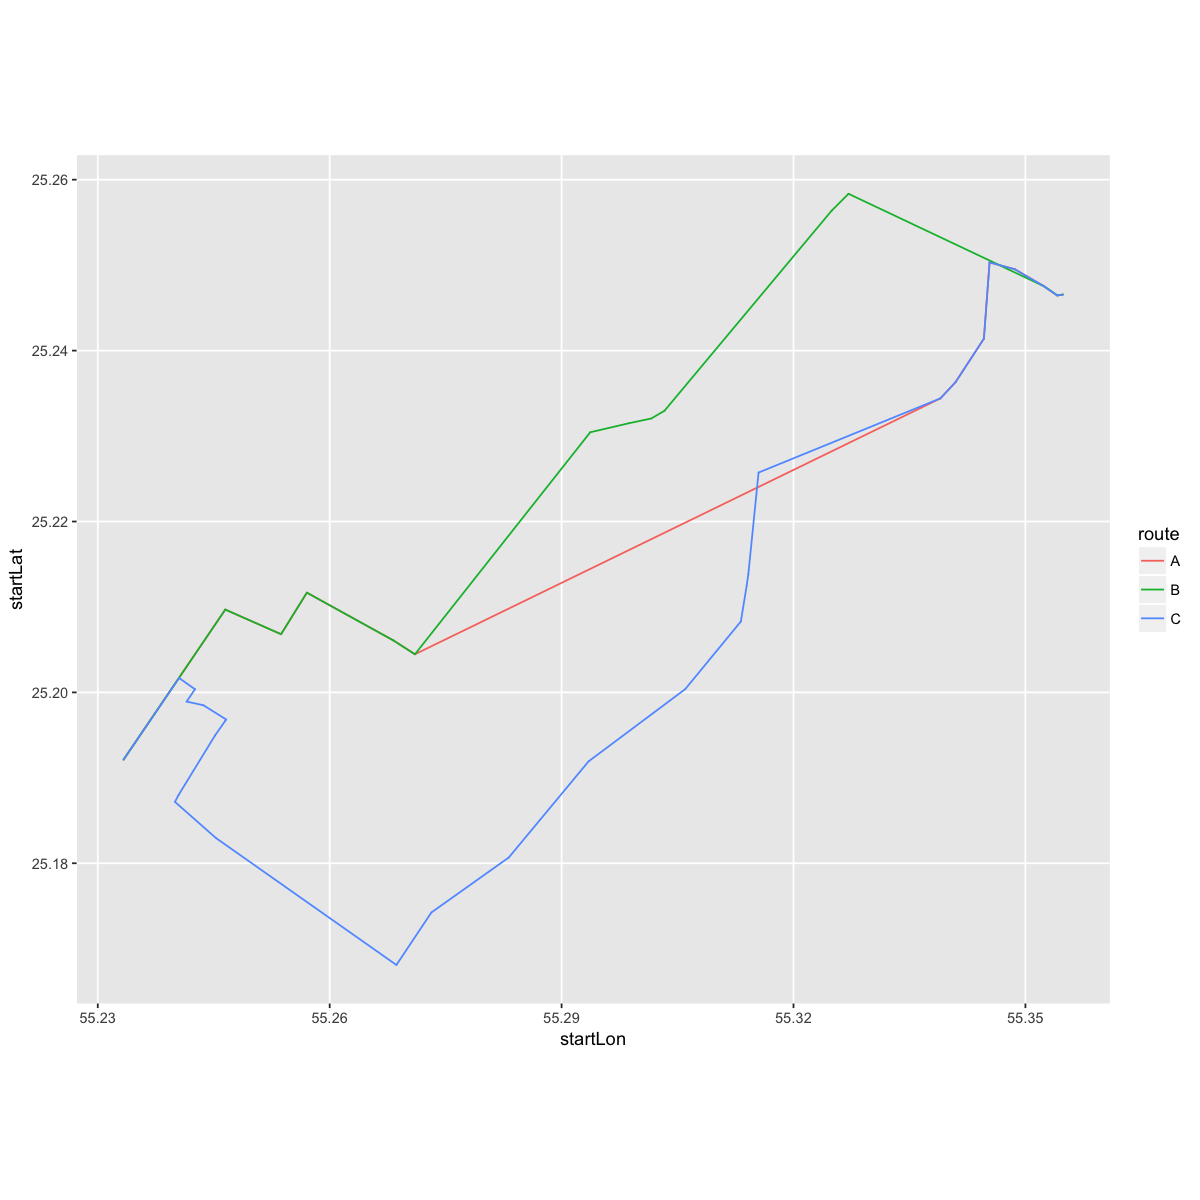

In [105]:
ggplot(data = var_ways) + geom_leg(aes(x = startLon, xend = endLon, y = startLat, yend = endLat, color = route)) + coord_map()

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=25.22,55.295&zoom=12&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false
Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”

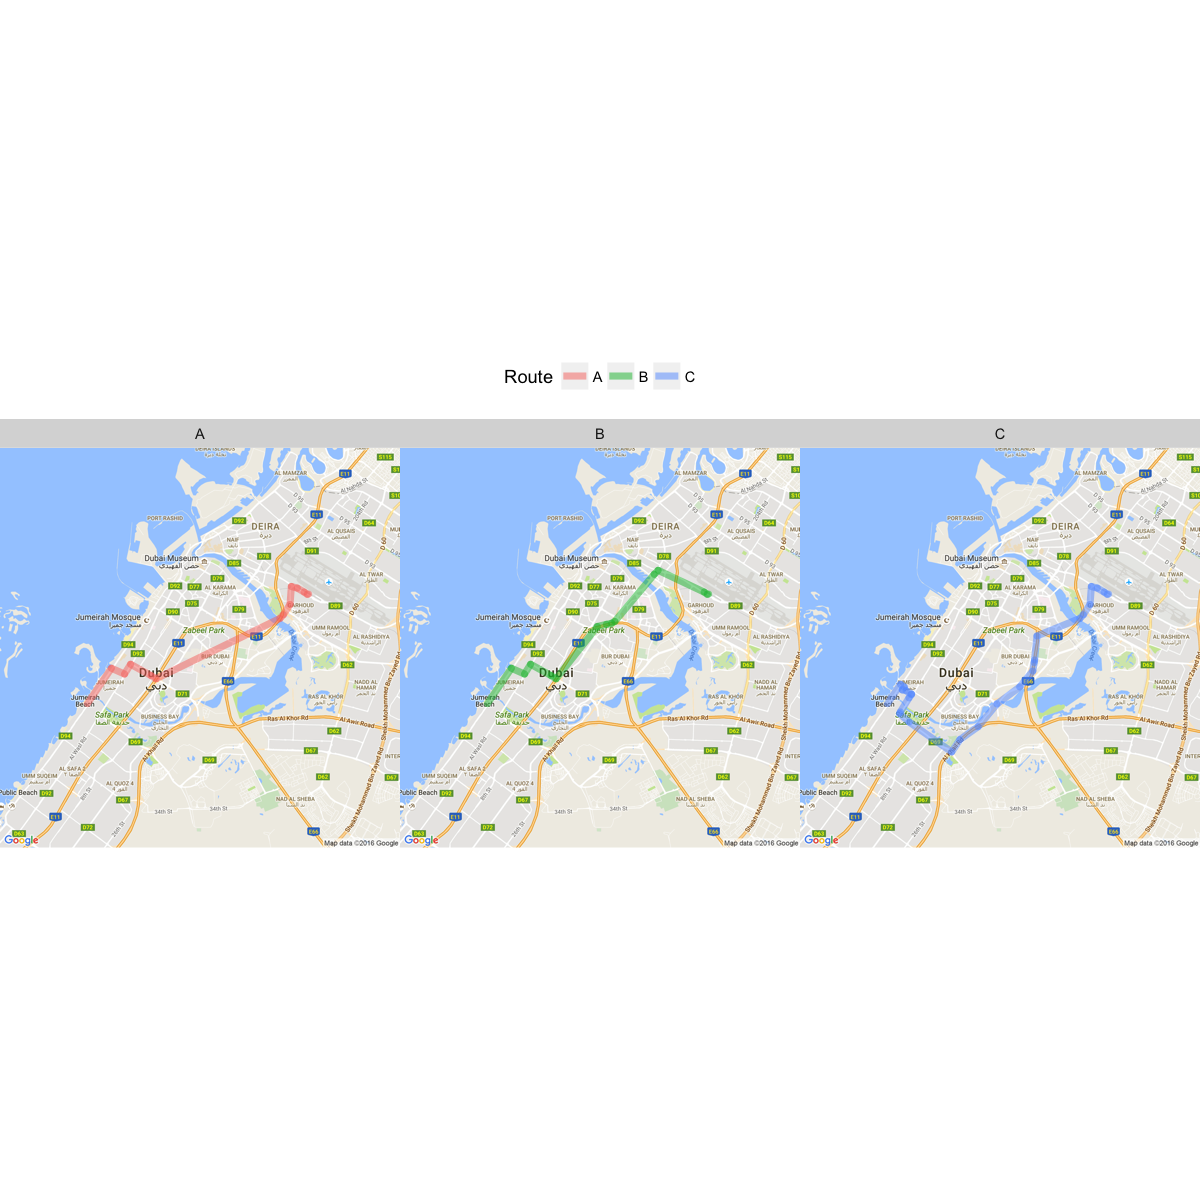

In [107]:
qmap(location=c(55.2950, 25.2200), zoom = 12, maptype = 'roadmap', base_layer = ggplot(aes(x = startLon, y = startLat), data = var_ways)) +
geom_leg(aes(x = startLon, xend = endLon, y = startLat, yend = endLat, color = route), alpha = 0.5, size = 2, data = var_ways) +
labs(x = 'Longitude', y = 'Latitude', colour = 'Route') +
facet_wrap(~ route, ncol = 3) + theme(legend.position = 'top')

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=25.22,55.295&zoom=12&size=640x640&scale=2&maptype=hybrid&language=en-EN&sensor=false


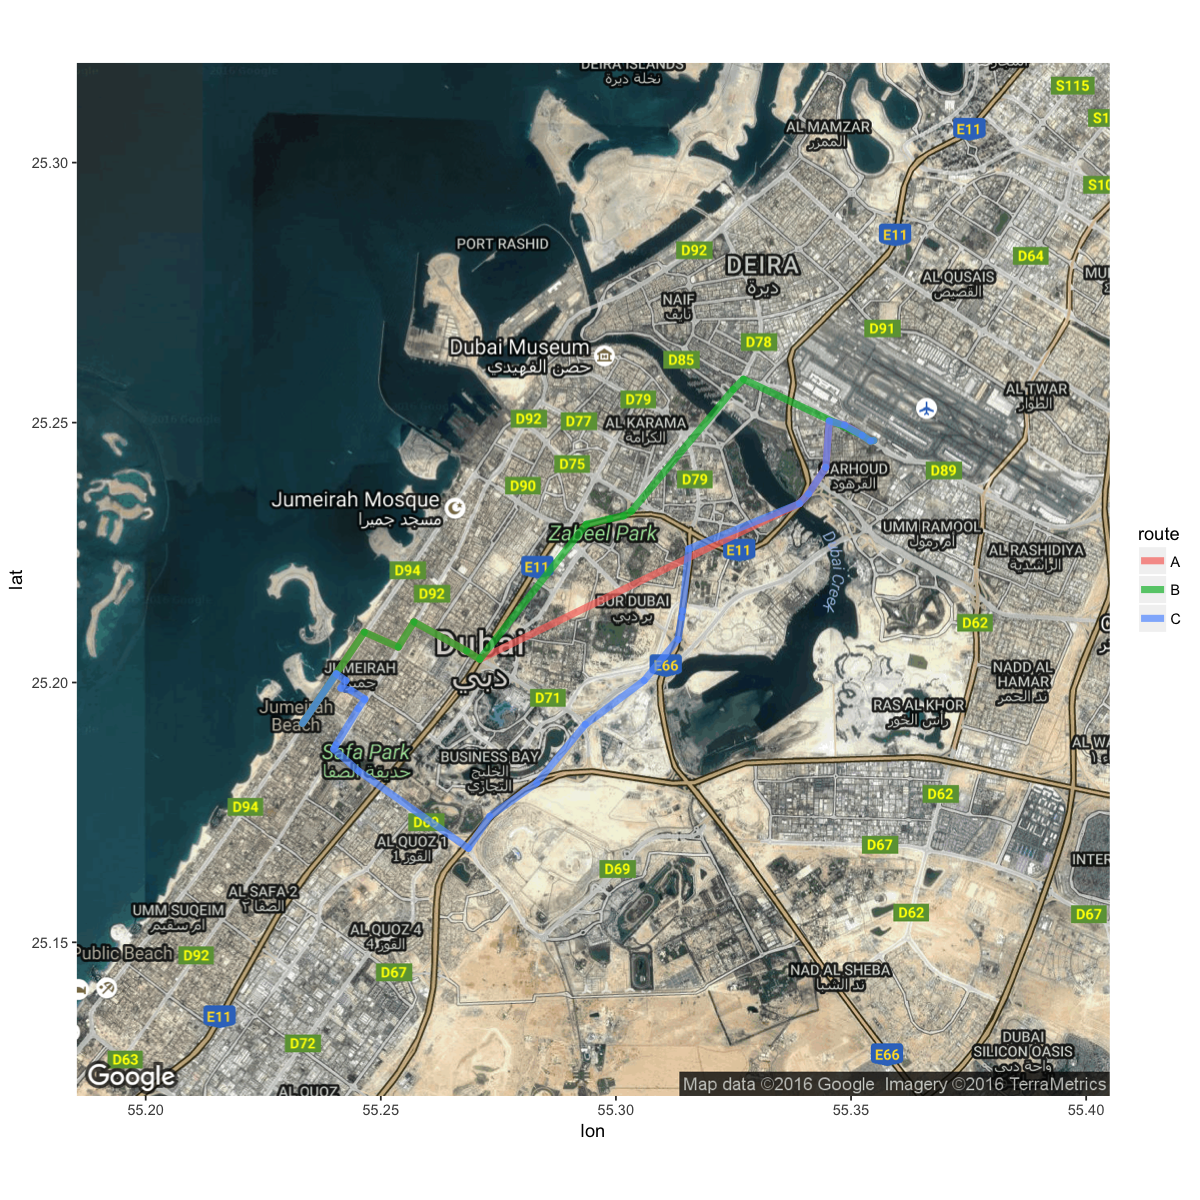

In [84]:
way_map <- get_map(location = c(55.2950, 25.2200), source = "google", zoom = 12, maptype = "hybrid")
ggmap(way_map) + geom_leg(data = var_ways, aes(x = startLon, xend = endLon, y = startLat, yend = endLat, color = route), alpha = 0.7, size = 2)

#### 1.2 Extract with osmar R
There are several ways to extract geodata. One of them is to do this with this R code cell.

This set of commands allows us to upload the data using the coordinates.

In [85]:
src <- osmsource_api()

In [86]:
smallbox <- center_bbox(55.2708, 25.2048, 1000, 1000)
sdubai <- get_osm(smallbox, source = src)

In [87]:
str(sdubai)

List of 3
 $ nodes    :List of 2
  ..$ attrs:'data.frame':	1558 obs. of  9 variables:
  .. ..$ id       : num [1:1558] 9.40e+07 1.12e+09 1.12e+09 1.12e+09 1.12e+09 ...
  .. ..$ visible  : Factor w/ 1 level "true": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ timestamp: POSIXlt[1:1558], format: "2010-12-02 13:32:04" "2012-08-14 22:09:32" ...
  .. ..$ version  : num [1:1558] 5 2 1 2 2 2 2 2 2 3 ...
  .. ..$ changeset: num [1:1558] 6514690 12732672 7103923 12732672 12732672 ...
  .. ..$ user     : Factor w/ 48 levels "Alex111X","andi9876",..: 39 42 42 42 42 42 42 42 42 42 ...
  .. ..$ uid      : Factor w/ 48 levels "10927","114220",..: 1 15 15 15 15 15 15 15 15 15 ...
  .. ..$ lat      : num [1:1558] 25.2 25.2 25.2 25.2 25.2 ...
  .. ..$ lon      : num [1:1558] 55.3 55.3 55.3 55.3 55.3 ...
  ..$ tags :'data.frame':	228 obs. of  3 variables:
  .. ..$ id: num [1:228] 6.04e+08 6.04e+08 6.04e+08 6.04e+08 6.04e+08 ...
  .. ..$ k : Factor w/ 43 levels "addr:city","addr:housenumber",..: 29 19 34 43 18 28 15

In [125]:
bigbox <- center_bbox(55.2708, 25.2048, 6000, 6000)
bdubai <- get_osm(bigbox, source = src)

In [126]:
str(bdubai)

List of 3
 $ nodes    :List of 2
  ..$ attrs:'data.frame':	47479 obs. of  9 variables:
  .. ..$ id       : num [1:47479] 30593914 30593915 31473923 31474006 31474005 ...
  .. ..$ visible  : Factor w/ 1 level "true": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ timestamp: POSIXlt[1:47479], format: "2016-08-19 09:40:14" "2010-12-14 12:40:14" ...
  .. ..$ version  : num [1:47479] 19 4 2 5 5 5 2 5 2 2 ...
  .. ..$ changeset: num [1:47479] 41552017 6657884 6514101 7313392 7313392 ...
  .. ..$ user     : Factor w/ 206 levels "08xavstj","12Katniss",..: 63 175 175 186 186 186 175 175 175 80 ...
  .. ..$ uid      : Factor w/ 206 levels "1069176","10927",..: 60 2 2 41 41 41 2 2 2 82 ...
  .. ..$ lat      : num [1:47479] 25.2 25.2 25.2 25.2 25.2 ...
  .. ..$ lon      : num [1:47479] 55.3 55.3 55.3 55.3 55.3 ...
  ..$ tags :'data.frame':	1890 obs. of  3 variables:
  .. ..$ id: num [1:1890] 9.11e+07 9.50e+07 9.50e+07 2.60e+08 2.81e+08 ...
  .. ..$ k : Factor w/ 104 levels "access","addr:city",..: 36 36 72 12 8

In [70]:
node_tags <- sort(unique(bdubai$nodes$tags$k))
print(node_tags)

  [1] access                          addr:city                      
  [3] addr:country                    addr:flats                     
  [5] addr:housename                  addr:housenumber               
  [7] addr:place                      addr:postcode                  
  [9] addr:street                     aeroway                        
 [11] amenity                         barrier                        
 [13] bench                           bicycle                        
 [15] building                        bus                            
 [17] capacity                        construction                   
 [19] contact:instagram               country                        
 [21] covered                         crossing                       
 [23] cuisine                         delivery                       
 [25] description                     diplomatic                     
 [27] direction                       drive_in                       
 [29] drive_through 

In [71]:
way_tags <- sort(unique(bdubai$ways$tags$k))
print(way_tags)

  [1] _building:height         _building:levels         access                  
  [4] access:note              addr:city                addr:country            
  [7] addr:housename           addr:housenumber         addr:postcode           
 [10] addr:street              addr:suburb              admin_level             
 [13] aerialway                aeroway                  alt_name                
 [16] alt_name:hu              alt_name2                alt_old_name:hu         
 [19] amenity                  area                     atm                     
 [22] barrier                  bicycle                  boundary                
 [25] bridge                   bridge:structure         building                
 [28] building:levels          building:material        building:part           
 [31] bus                      cables                   capacity                
 [34] construction             contact:email            contact:facebook        
 [37] contact:fax           

In [72]:
users <- unique(bdubai$nodes$attrs$user)
print(users)

  [1] FresRe                   Skywave                  Tommy                   
  [4] hno2                     Cali42                   bigbug21                
  [7] mkarau                   DerCut                   msghmr                  
 [10] greecemapper             rehan727                 GeoGrafiker             
 [13] GRagib                   Veit                     Rudy355                 
 [16] ratrun                   sunmarke                 13 digits               
 [19] Tiramon                  Daniel Damianov          mx18                    
 [22] tiger_old                lorenzo23622             eXmajor                 
 [25] vamros                   Jennings Anderson        OSMF Redaction Account  
 [28] Binu Soman Punalur       Кирилл Игоревич          Sharat Sreedharan Nair  
 [31] Maxoo60                  csdf                     Calibrator              
 [34] robgeb                   Otti38                   mawueth                 
 [37] SEVEN                 

In [73]:
uids <- sort(unique(bdubai$nodes$attrs$uid))
length(uids)

[1] 207

#### 1.3 Plotting with osmar R

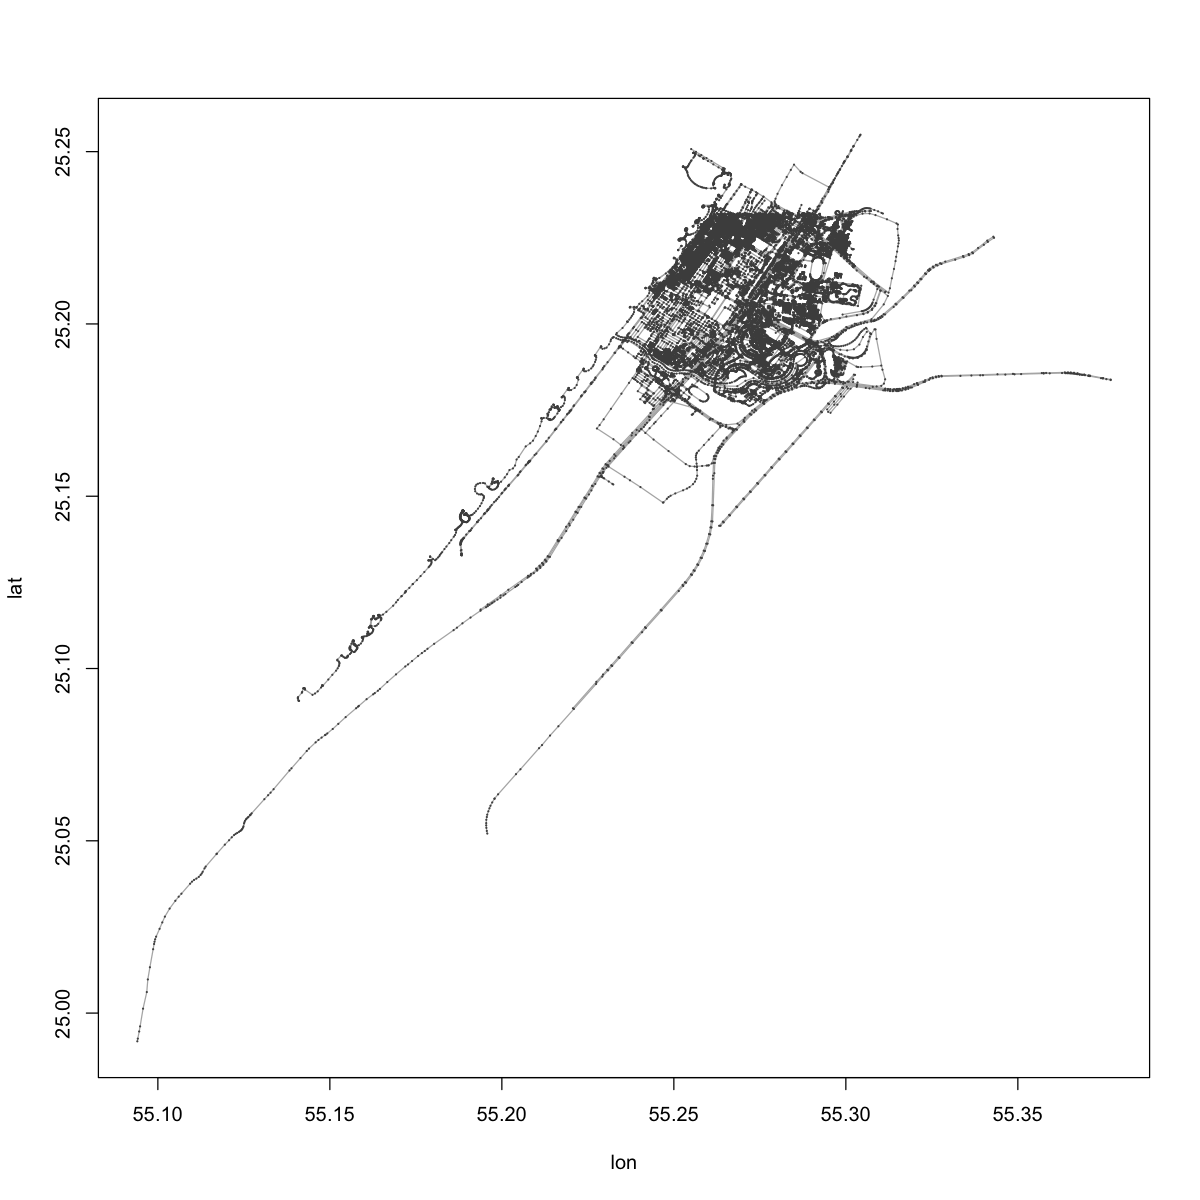

In [74]:
plot(bdubai)

In [75]:
tss <- find(sdubai, node(tags(v == "traffic_signals")))
ts_sdubai <- subset(sdubai, node_ids = tss)

In [76]:
bss <- find(sdubai, node(tags(v %agrep% "busstop")))
bs_sdubai <- subset(sdubai, node_ids = bss)

In [77]:
hws <- find(sdubai, way(tags(k == "highway")))
hws <- find_down(sdubai, way(hws))

In [78]:
hw_sdubai <- subset(sdubai, ids = hws)

In [79]:
tus <- find(sdubai, way(tags(k == "tunnel")))
tus <- find_down(sdubai, way(tus))

In [80]:
tu_sdubai <- subset(sdubai, ids = tus)

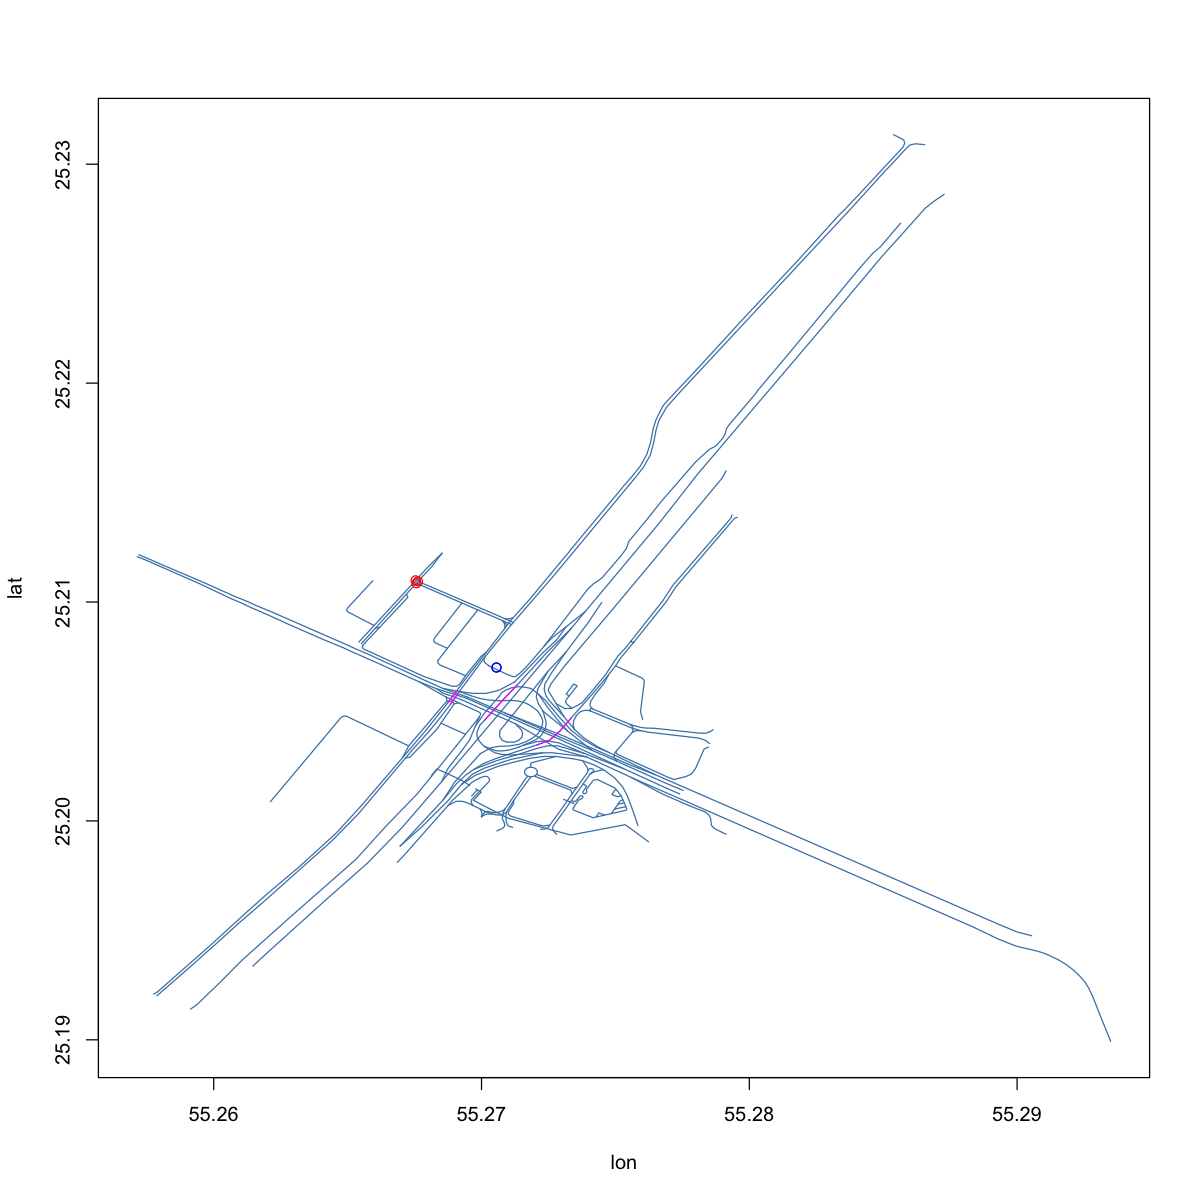

In [81]:
plot_ways(hw_sdubai, col = "steelblue")
plot_ways(tu_sdubai, add = TRUE, col = "magenta")
plot_nodes(ts_sdubai, add = TRUE, col = "red")
plot_nodes(bs_sdubai, add = TRUE, col = "blue")

In [82]:
ts <- find(bdubai, node(tags(v == "traffic_signals")))
ts_dubai <- subset(bdubai, node_ids = ts)

In [83]:
bs <- find(bdubai, node(tags(v %agrep% "busstop")))
bs_dubai <- subset(bdubai, node_ids = bs)

In [84]:
hw <- find(bdubai, way(tags(k == "highway")))
hw <- find_down(bdubai, way(hw))

In [85]:
hw_dubai <- subset(bdubai, ids = hw)

In [86]:
tu <- find(bdubai, way(tags(k == "tunnel")))
tu <- find_down(bdubai, way(tu))

In [87]:
tu_dubai <- subset(bdubai, ids = tu)

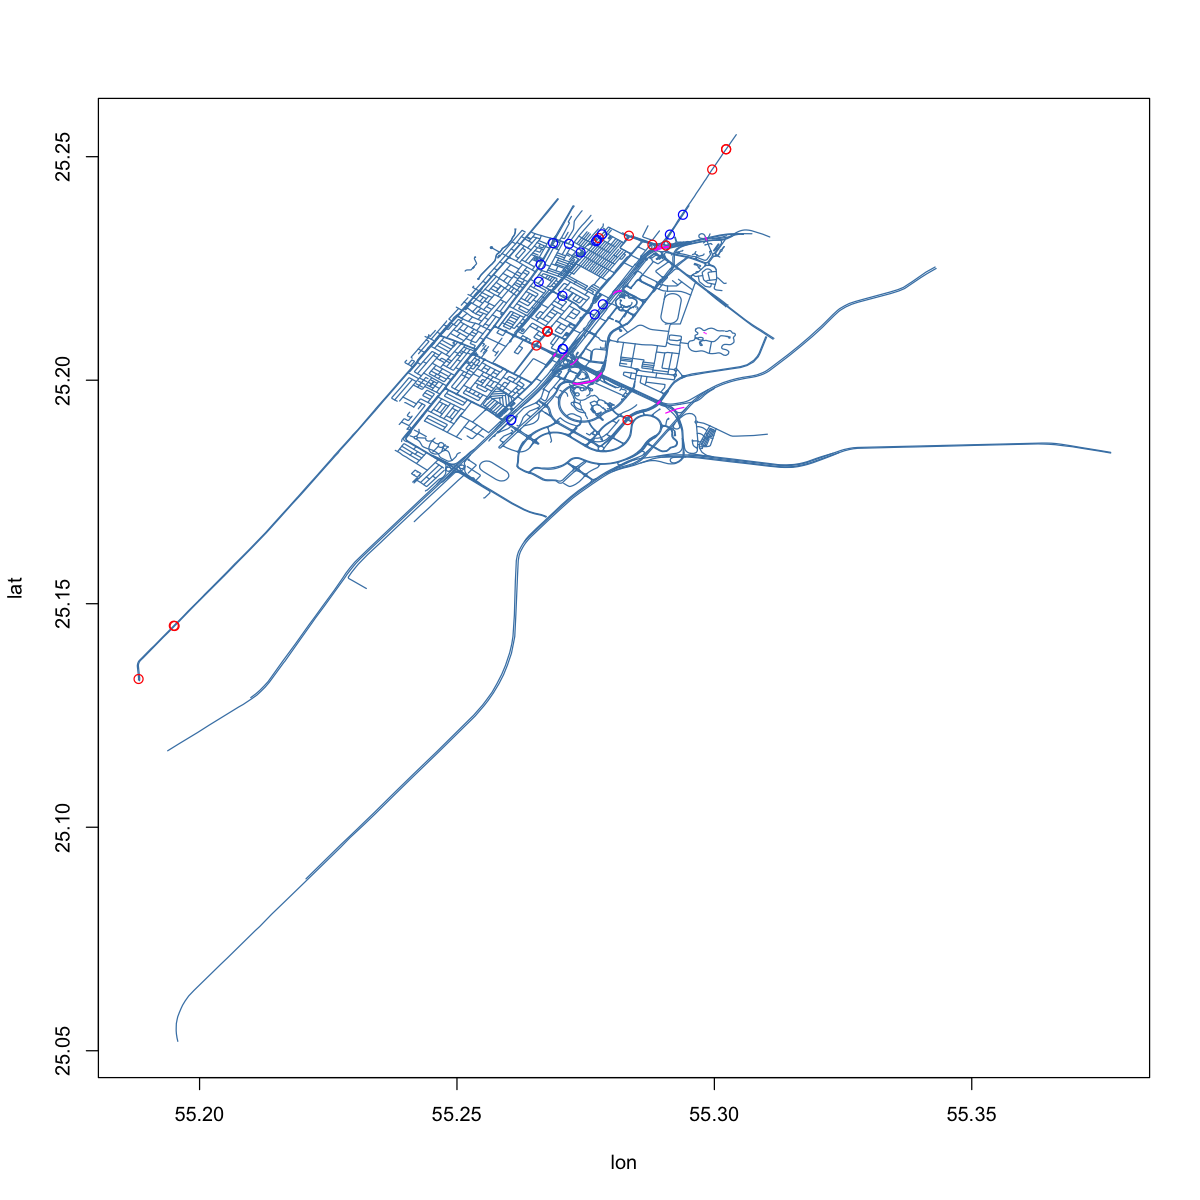

In [88]:
plot_ways(hw_dubai, col = "steelblue")
plot_ways(tu_dubai, add = TRUE, col = "magenta")
plot_nodes(ts_dubai, add = TRUE, col = "red")
plot_nodes(bs_dubai, add = TRUE, col = "blue")

In [89]:
brewer.pal.info["Set3",]$maxcolors

[1] 12

In [90]:
bg <- find(bdubai, way(tags(k == "building")))
bg <- find_down(bdubai, way(bg))

In [91]:
bg_dubai <- subset(bdubai, ids = bg)

In [92]:
bg_poly <- as_sp(bg_dubai, "polygons")

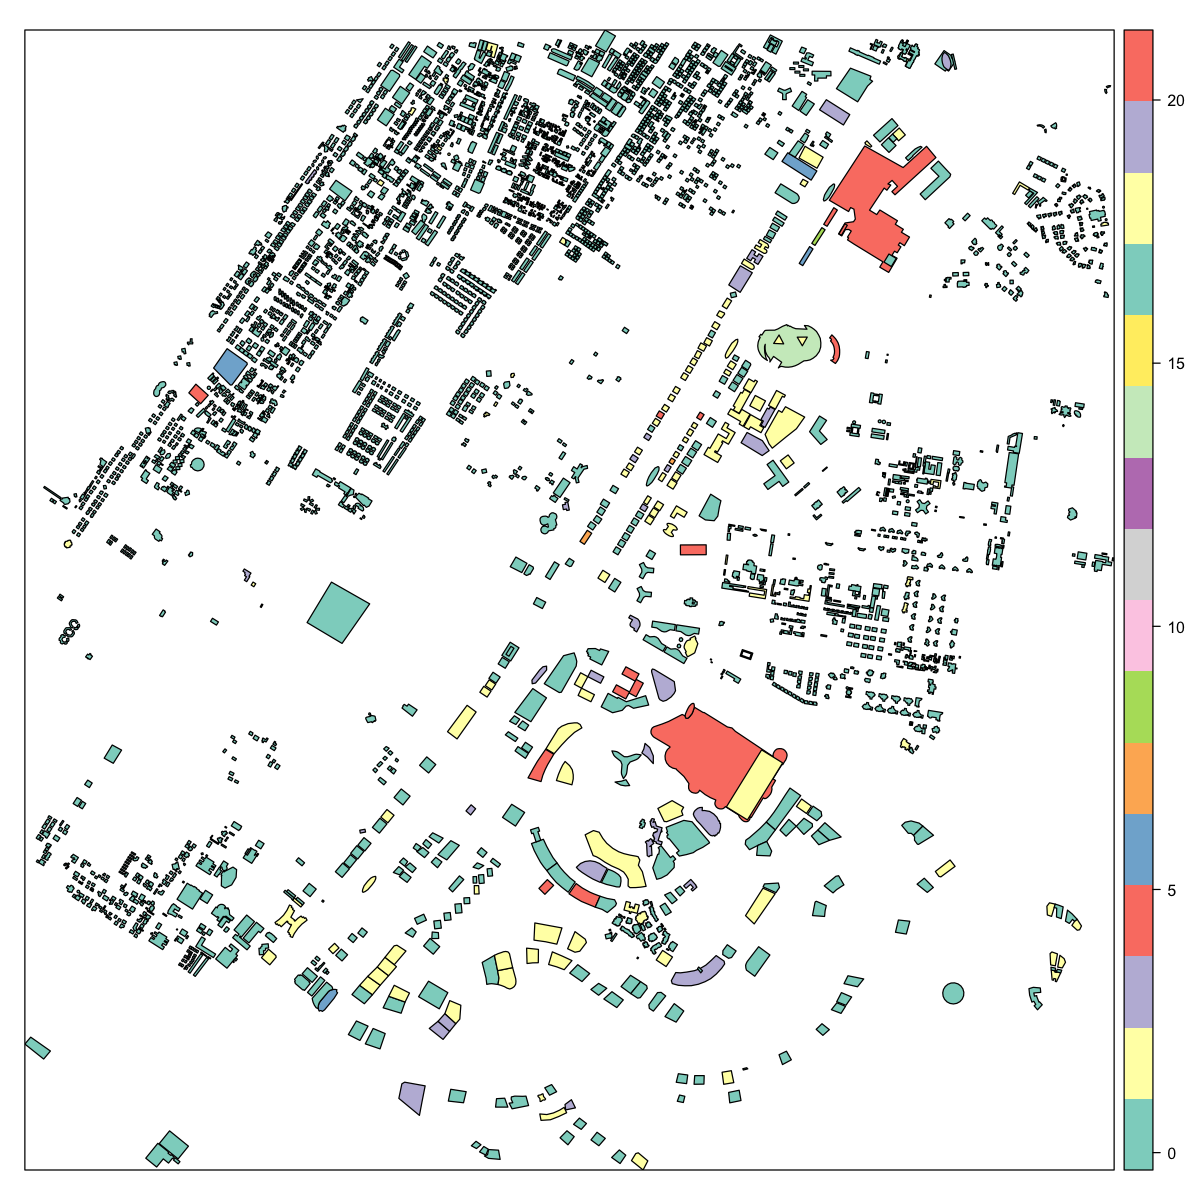

In [93]:
spplot(bg_poly, col.regions=brewer.pal(12, "Set3"), c("version"))

In [94]:
# bus <- find(bdubai, relation(tags(v == "bus")))
# bus_dubai <- lapply(bus, function(i) { as_sp(get_osm(relation(i), full = TRUE), "lines") })

In [95]:
bs_points <- as_sp(bs_dubai, "points")

In [96]:
hw_line <- as_sp(hw_dubai, "lines")

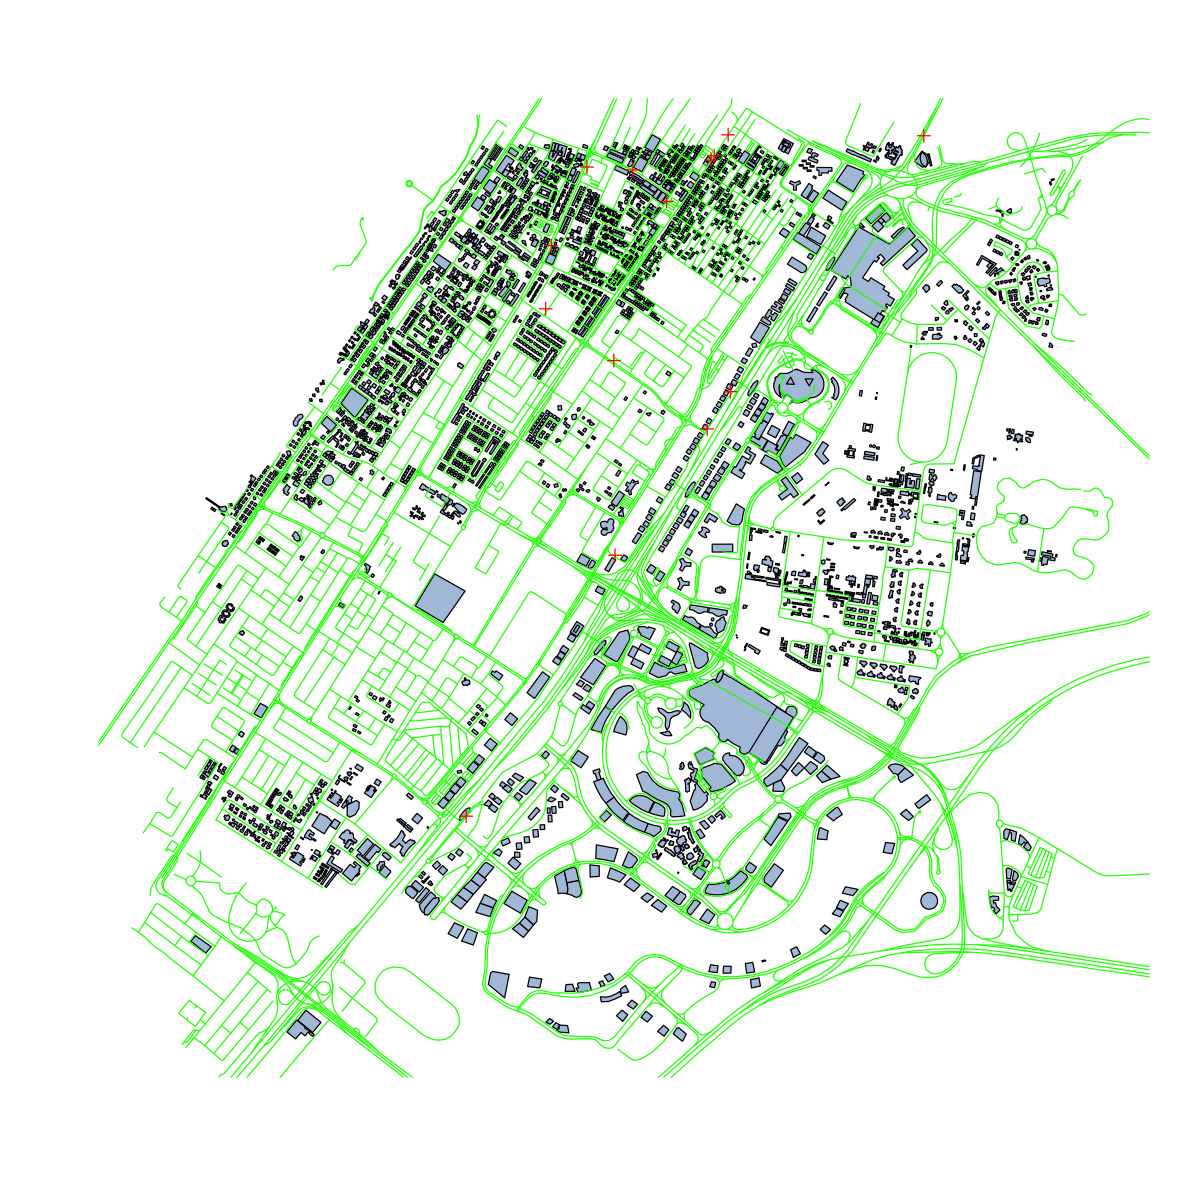

In [97]:
plot(bg_poly, col = "lightsteelblue")
plot(hw_line, add = TRUE, col = "green")
plot(bs_points, add = TRUE, col = "red")
# for ( i in seq(along = bus_dubai) ) { plot(bus[[i]], add = TRUE, col = "blue") }

#### 1.4. Size of downloaded files.

In [98]:
file.size("dubai_abu-dhabi.osm")

[1] 394382598

In [99]:
file.size("dubai_abu-dhabi.osm.json")

[1] 458155339

In [100]:
file.size("nodes.csv")

[1] 154228820

In [101]:
file.size("nodes_tags.csv")

[1] 3912302

In [102]:
file.size("ways_nodes.csv")

[1] 55135540

In [103]:
file.size("ways.csv")

[1] 13797779

In [104]:
file.size("ways_tags.csv")

[1] 13383027

#### 1.5 Osmar sources

In [1]:
source1 <- osmsource_file("dubai_abu-dhabi.osm")

ERROR: Error in eval(expr, envir, enclos): не могу найти функцию "osmsource_file"


In [108]:
# dubai1 <- get_osm(complete_file(), source=source1)

In [107]:
dubai2 <- osmar:::get_osm_data.osmfile(source1)

In [109]:
dubai2[5]

[1] "\t<node id=\"21133779\" lat=\"25.148038\" lon=\"55.3862105\" version=\"2\" timestamp=\"2011-02-15T02:24:42Z\" changeset=\"7291467\" uid=\"18885\" user=\"Tommy\"/>"

In [110]:
line5 <- as_osmar(xmlParse(dubai2[5]))
line5

osmar object
1 nodes, 0 ways, 0 relations

In [106]:
get_osm(node(21133779), source = osmsource_api())

osmar object
1 nodes, 0 ways, 0 relations

### 2. CSV & SQL

The displayed lines of code represent the process of recording information of the CSV files to the SQL database.

#### 2.1. From osmar to csv files

In [ ]:
write.csv(dubai1$nodes$attrs, file = "rnodes.csv")
file.size("rnodes.csv")

In [ ]:
write.csv(dubai1$nodes$tags, file = "rnodes_tags.csv")
file.size("rnodes_tags.csv")

In [ ]:
write.csv(dubai1$ways$attrs, file = "rways.csv")
file.size("rways.csv")

In [ ]:
write.csv(dubai1$ways$tags, file = "rways_tags.csv")
file.size("rways_tags.csv")

In [ ]:
write.csv(dubai1$ways$refs, file = "rways_refs.csv")
file.size("rways_refs.csv")

In [ ]:
write.csv(dubai1$relations$attrs, file = "rrelations.csv")
file.size("rrelations.csv")

In [ ]:
write.csv(dubai1$relation$tags, file = "rrelations_tags.csv")
file.size("rrelations_tags.csv")

In [ ]:
write.csv(dubai1$relation$refs, file = "rrelations_refs.csv")
file.size("rrelations_refs.csv")

#### 2.2. From csv files to SQL

In [186]:
# Variant 1

In [140]:
sqlite <- dbDriver("SQLite")

In [141]:
dubai_abu_dhabi <- dbConnect(sqlite,"dubai_abu_dhabi.sqlite3")

In [200]:
nodes <- read.csv('nodes.csv')
nodes_tags <- read.csv('nodes_tags.csv')
ways <- read.csv('ways.csv')
ways_tags <- read.csv('ways_tags.csv')
ways_nodes <- read.csv('ways_nodes.csv')

In [201]:
dbWriteTable(conn = dubai_abu_dhabi, name = 'nodes', value = nodes, row.names = FALSE)

[1] TRUE

In [202]:
dbWriteTable(conn = dubai_abu_dhabi, name = 'nodes_tags', value = nodes_tags, row.names = FALSE)

[1] TRUE

In [203]:
dbWriteTable(conn = dubai_abu_dhabi, name = 'ways', value = ways, row.names = FALSE)

[1] TRUE

In [204]:
dbWriteTable(conn = dubai_abu_dhabi, name = 'ways_tags', value = ways_tags, row.names = FALSE)

[1] TRUE

In [205]:
dbWriteTable(conn = dubai_abu_dhabi, name = 'ways_nodes', value = ways_nodes, row.names = FALSE)

[1] TRUE

In [143]:
dbListTables(dubai_abu_dhabi)

[1] "nodes"      "nodes_tags" "ways"       "ways_nodes" "ways_tags"

In [144]:
dbListFields(dubai_abu_dhabi, 'nodes')

[1] "id"        "lat"       "lon"       "user"      "uid"       "version"  
[7] "changeset" "timestamp"

In [145]:
dbListFields(dubai_abu_dhabi, 'nodes_tags')

[1] "id"    "key"   "value" "type"

In [146]:
dbListFields(dubai_abu_dhabi, 'ways')

[1] "id"        "user"      "uid"       "version"   "changeset" "timestamp"

In [147]:
dbListFields(dubai_abu_dhabi, 'ways_tags')

[1] "id"    "key"   "value" "type"

In [148]:
dbListFields(dubai_abu_dhabi, 'ways_nodes')

[1] "id"       "node_id"  "position"

In [264]:
dbDisconnect(dubai_abu_dhabi)

Warning message:
“Expired SQLiteConnection.”

[1] TRUE

In [156]:
# Variant 2

In [ ]:
sqldf("attach dubai_abu_dhabi as new")

In [ ]:
read.csv.sql("nodes.csv", sql = "create table nodes as select * from file", dbname = "dubai_abu_dhabi")

In [ ]:
sqldf("select * from nodes limit 3", dbname = "dubai_abu_dhabi")

In [245]:
read.csv.sql("nodes_tags.csv", sql = "create table nodes_tags as select * from file", dbname = "dubai_abu_dhabi")

In [246]:
sqldf("select * from nodes_tags limit 3", dbname = "dubai_abu_dhabi")

id       key      value           type   
1 21136186 crossing island          regular
2 21136186 highway  traffic_signals regular
3 21161907 operator Eppco           regular

In [247]:
# read.csv.sql("ways.csv", sql = "create table ways as select * from file", dbname = "dubai_abu_dhabi")

In [248]:
sqldf("select * from ways limit 3", dbname = "dubai_abu_dhabi")

id      user     uid     version changeset timestamp           
1 4009554 rehan727 2952340 25      42505170  2016-09-28T21:02:31Z
2 4334711 4b696d   1420318 21      28096059  2015-01-12T19:49:12Z
3 4340534 wk2      1808544 18      18943947  2013-11-16T22:28:53Z

In [249]:
# read.csv.sql("ways_tags.csv", sql = "create table ways_tags as select * from file", dbname = "dubai_abu_dhabi")

In [250]:
sqldf("select * from ways_tags limit 3", dbname = "dubai_abu_dhabi")

id      key     value               type   
1 4009554 bridge  yes                 regular
2 4009554 lanes   no|no|no|no|yes|yes hgv    
3 4009554 highway motorway            regular

In [251]:
# read.csv.sql("ways_nodes.csv", sql = "create table ways_nodes as select * from file", dbname = "dubai_abu_dhabi")

In [252]:
sqldf("select * from ways_nodes limit 3", dbname = "dubai_abu_dhabi")

id      node_id  position
1 4009554 90031463 0       
2 4009554 90028252 1       
3 4009554 21133804 2

#### 2.3 SQL quering

In [2]:
query001 = "SELECT COUNT(*) FROM nodes;"
query002 = "SELECT COUNT(*) FROM ways;"

The number of nodes:

In [256]:
sqldf(query001)

COUNT(*)
1 1890178

The number of ways:

In [257]:
sqldf(query002)

COUNT(*)
1 234327

The number of users:

In [142]:
print(sqldf("SELECT COUNT(DISTINCT(e.uid)) FROM (SELECT uid FROM nodes UNION ALL SELECT uid FROM ways) e;"))

ERROR: Error in sqliteSendQuery(con, statement, bind.data): error in statement: no such table: ways


In [124]:
# Variant 1
mg1 <- mongoDbConnect('test')

### 3. JSON & Mongo DB

In [78]:
# mongod from terminal

character(0)

In [ ]:
# Variant 2

In [79]:
enstreetmap", verbose = FALSE)m <- mongo("op

In [80]:
# stream_in(file("dubai_abu-dhabi.osm.json"), handler = function(df){m$insert(df)})

In [81]:
m$count()

[1] 2124505

In [82]:
m$info()

$name
[1] "openstreetmap"

$stats
$stats$ns
[1] "test.openstreetmap"

$stats$count
[1] 2124505

$stats$size
[1] 502488587

$stats$avgObjSize
[1] 236

$stats$storageSize
[1] 155140096

$stats$capped
[1] FALSE

$stats$wiredTiger
$stats$wiredTiger$metadata
$stats$wiredTiger$metadata$formatVersion
[1] 1


$stats$wiredTiger$creationString
[1] "allocation_size=4KB,app_metadata=(formatVersion=1),block_allocation=best,block_compressor=snappy,cache_resident=0,checksum=on,colgroups=,collator=,columns=,dictionary=0,encryption=(keyid=,name=),exclusive=0,extractor=,format=btree,huffman_key=,huffman_value=,immutable=0,internal_item_max=0,internal_key_max=0,internal_key_truncate=,internal_page_max=4KB,key_format=q,key_gap=10,leaf_item_max=0,leaf_key_max=0,leaf_page_max=32KB,leaf_value_max=64MB,log=(enabled=),lsm=(auto_throttle=,bloom=,bloom_bit_count=16,bloom_config=,bloom_hash_count=8,bloom_oldest=0,chunk_count_limit=0,chunk_max=5GB,chunk_size=10MB,merge_max=15,merge_min=0),memory_page_max=10m,os_cache_dirty_max=0,os_cache_max=0,prefix_compression=0,prefix_compression_min=4,source=,split_deepen_min_child=0,split_deepen_per_child=0,split_pct=90,type=file,value_format=u"

$stats$wiredTiger$type
[1] "file"

$stats$wiredTiger$uri
[1] "statistics:table:collection-2--5321892968811513580"

$stats$wiredTiger$LSM
$stats$wiredTiger$LSM$`bloom filter false positives`
[1] 0

$stats$wiredTiger$LSM$`bloom filter hits`
[1] 0

$stats$wiredTiger$LSM$`bloom filter misses`
[1] 0

$stats$wiredTiger$LSM$`bloom filter pages evicted from cache`
[1] 0

$stats$wiredTiger$LSM$`bloom filter pages read into cache`
[1] 0

$stats$wiredTiger$LSM$`bloom filters in the LSM tree`
[1] 0

$stats$wiredTiger$LSM$`chunks in the LSM tree`
[1] 0

$stats$wiredTiger$LSM$`highest merge generation in the LSM tree`
[1] 0

$stats$wiredTiger$LSM$`queries that could have benefited from a Bloom filter that did not exist`
[1] 0

$stats$wiredTiger$LSM$`sleep for LSM checkpoint throttle`
[1] 0

$stats$wiredTiger$LSM$`sleep for LSM merge throttle`
[1] 0

$stats$wiredTiger$LSM$`total size of bloom filters`
[1] 0


$stats$wiredTiger$`block-manager`
$stats$wiredTiger$`block-manager`$`allocations requiring file extension`
[1] 0

$stats$wiredTiger$`block-manager`$`blocks allocated`
[1] 0

$stats$wiredTiger$`block-manager`$`blocks freed`
[1] 0

$stats$wiredTiger$`block-manager`$`checkpoint size`
[1] 155156480

$stats$wiredTiger$`block-manager`$`file allocation unit size`
[1] 4096

$stats$wiredTiger$`block-manager`$`file bytes available for reuse`
[1] 36864

$stats$wiredTiger$`block-manager`$`file magic number`
[1] 120897

$stats$wiredTiger$`block-manager`$`file major version number`
[1] 1

$stats$wiredTiger$`block-manager`$`file size in bytes`
[1] 155140096

$stats$wiredTiger$`block-manager`$`minor version number`
[1] 0


$stats$wiredTiger$btree
$stats$wiredTiger$btree$`btree checkpoint generation`
[1] 0

$stats$wiredTiger$btree$`column-store fixed-size leaf pages`
[1] 0

$stats$wiredTiger$btree$`column-store internal pages`
[1] 0

$stats$wiredTiger$btree$`column-store variable-size RLE encoded values`
[1] 0

$stats$wiredTiger$btree$`column-store variable-size deleted values`
[1] 0

$stats$wiredTiger$btree$`column-store variable-size leaf pages`
[1] 0

$stats$wiredTiger$btree$`fixed-record size`
[1] 0

$stats$wiredTiger$btree$`maximum internal page key size`
[1] 368

$stats$wiredTiger$btree$`maximum internal page size`
[1] 4096

$stats$wiredTiger$btree$`maximum leaf page key size`
[1] 2867

$stats$wiredTiger$btree$`maximum leaf page size`
[1] 32768

$stats$wiredTiger$btree$`maximum leaf page value size`
[1] 67108864

$stats$wiredTiger$btree$`maximum tree depth`
[1] 0

$stats$wiredTiger$btree$`number of key/value pairs`
[1] 0

$stats$wiredTiger$btree$`overflow pages`
[1] 0

$stats$wiredTiger$btree$`pages rewritten by compaction`
[1] 0

$stats$wiredTiger$btree$`row-store internal pages`
[1] 0

$stats$wiredTiger$btree$`row-store leaf pages`
[1] 0


$stats$wiredTiger$cache
$stats$wiredTiger$cache$`bytes